In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from kmtr.datasets_and_metrics import MDS, mini_higgs, Higgs, relative_error, one_minus_auc
import time
from pathlib import Path

In [38]:
datasets = ["MSD", "HIGGS", "mini_Higgs"]
dfs = []

for dataset in datasets:
    files = [p for p in Path(f"outputs/{dataset}").rglob("*") if p.is_file()]
    for f in files:
        df = pd.read_csv(f)
        df["method"] = f.name.split("_")[0]
        df["dataset"] = dataset
        dfs.append(df)

df = pd.concat(dfs)

/tmp/ipykernel_884659/1772418273.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs)


In [49]:
def plot(ax, df):
    """df must contain columns: train_s, method, rel_err"""

    palette = {
        "Nystrom": "#1fb44c",
        "Falkon": "#ff7f0e",
        "FalkonGPU": "#db3e31",
        "GPytorch": "#030ea3",
    }

    dashes = {
        "Nystrom": "",
        "Falkon": "",
        "FalkonGPU": "",
        "GPytorch": (4, 2),   # dashed line
    }

    sns.lineplot(
        data=df,
        x="train_s",
        y="rel_err",
        hue="method",
        style="method",
        palette=palette,
        dashes=dashes,
        markers=True,
        linewidth=2.5,
        ax=ax,
    )

    ax.set_xlabel("Training time (s)")
    ax.set_ylabel("Relative error")
    ax.legend(title="Method", frameon=True)

    return ax


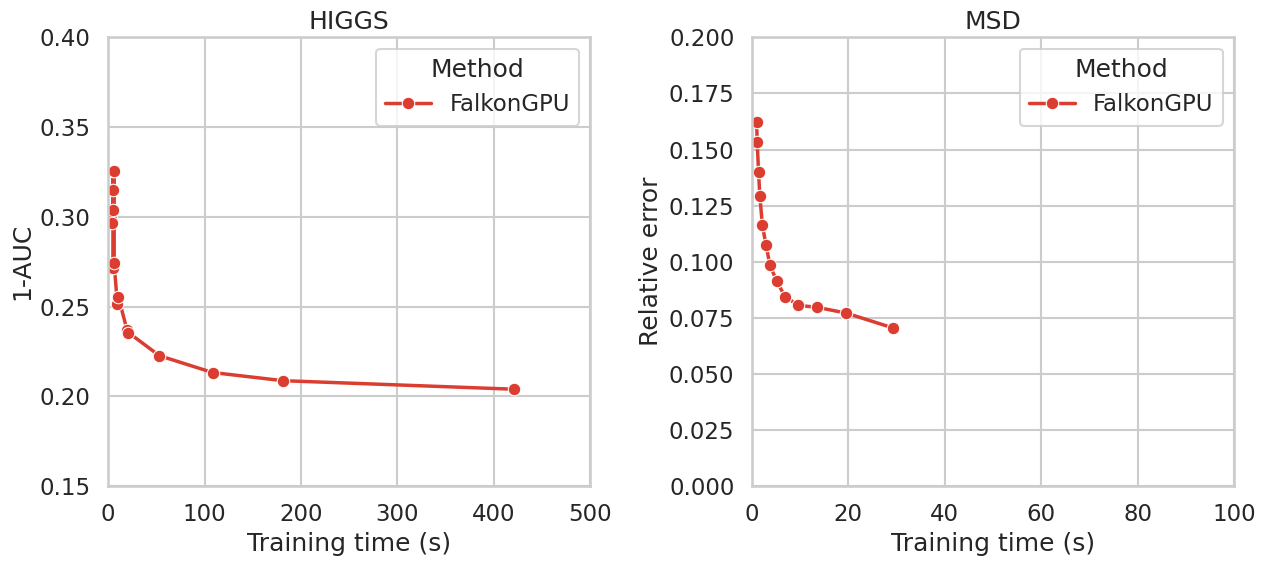

In [54]:
sns.set_theme(style="whitegrid", context="talk")
df_higgs = df[
    (df["dataset"] == "HIGGS") &
    (df["method"].isin(["FalkonGPU"]))
]
df_msd = df[
    (df["dataset"] == "MSD") &
    (df["method"].isin(["FalkonGPU"]))
]

# make figure
fig, ax = plt.subplots(1,2, figsize=(13, 6))
ax[0] = plot(ax[0], df_higgs)
ax[1] = plot(ax[1], df_msd)

ax[0].set_xlim(0,500)
ax[0].set_ylim(0.15,0.4)
ax[0].set_title("HIGGS")
ax[0].set_ylabel("1-AUC")

ax[1].set_xlim(0,100)
ax[1].set_ylim(0,0.2)
ax[1].set_title("MSD")

plt.tight_layout()
plt.savefig("figures/scalling_laws.png", dpi=250)

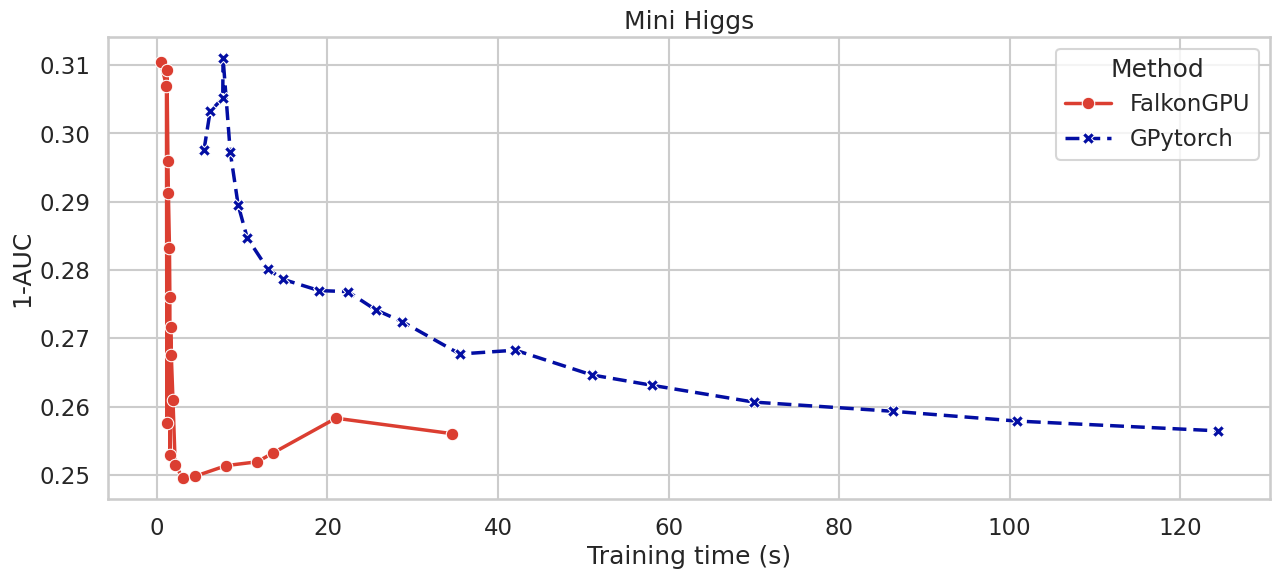

In [58]:
df_minihiggs =  df[
    (df["dataset"] == "mini_Higgs") &
    (df["method"].isin(["GPytorch", "FalkonGPU"]))
]

fig, ax = plt.subplots(1,1, figsize=(15, 6))
ax = plot(ax, df_minihiggs)
ax.set_title("Mini Higgs")
ax.set_ylabel("1-AUC")
plt.savefig("figures/Compairaison.png", dpi=250)

# Linear Regression

In [59]:
X_train, y_train, X_test, y_test = MDS()

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)
relative_error(model.predict(X_test), y_test)

np.float64(0.0033944838935707706)

In [65]:
X_train, y_train, X_test, y_test = Higgs()

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)
one_minus_auc(model.predict(X_test), y_test)

0.316500103493074